<a href="https://colab.research.google.com/github/Ru1chi/big-mart-sales-prediction/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/train.csv')


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df['Item_Outlet_Sales']


,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [ ]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


<Axes: >

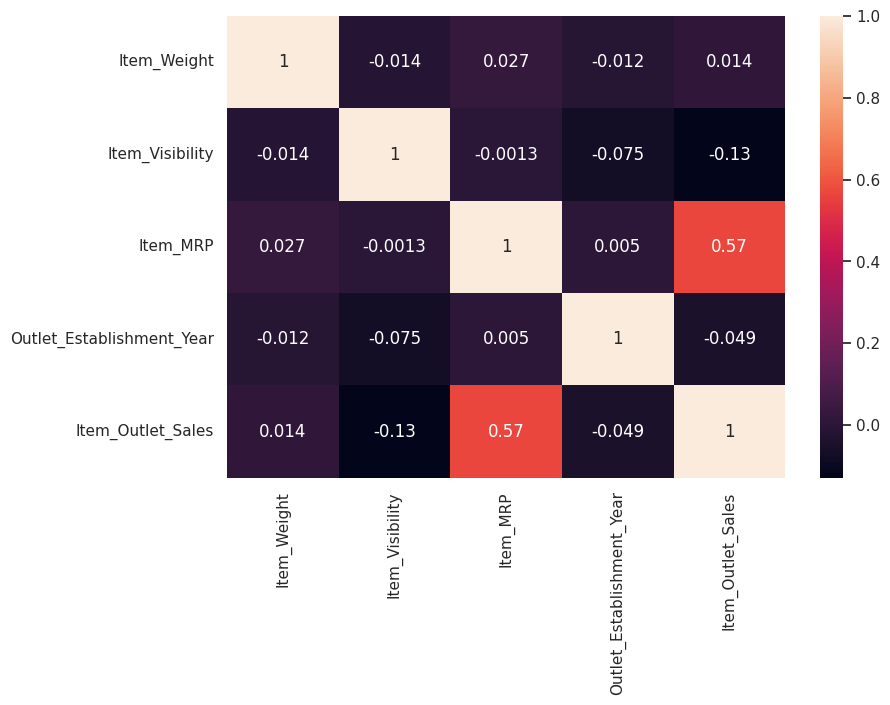

In [ ]:
plt.figure(figsize=(9,6))
sns.set()
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


<Axes: >

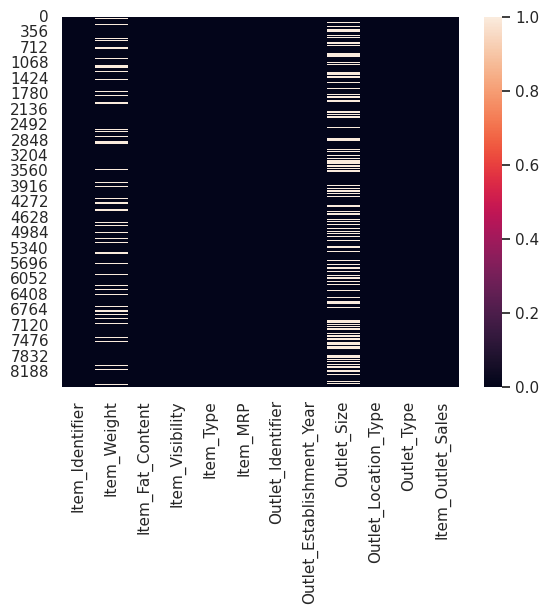

In [ ]:
sns.heatmap(df.isnull())


In [ ]:
df['Item_Weight']


,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [ ]:
df['Item_Weight'].mean()


12.857645184135976

In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: >

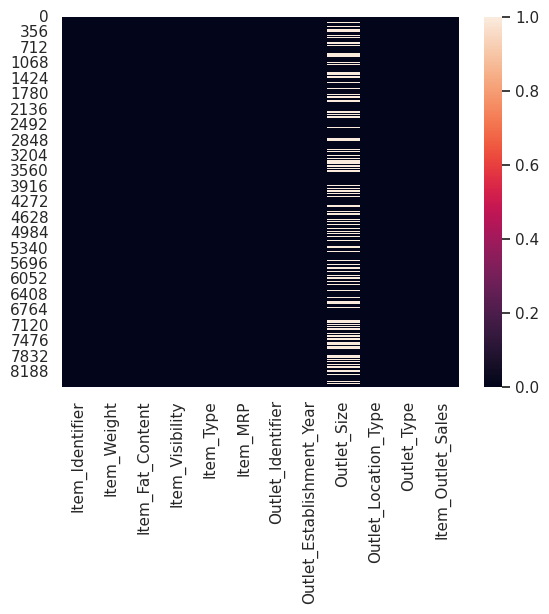

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['Outlet_Size']


,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


In [ ]:
mode_outlet_size=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))


In [ ]:
mode_outlet_size


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
def impuet_outlet_size(cols):
    outlet_size=cols[0]
    outlet_type=cols[1]
    if pd.isnull(outlet_size):
        if outlet_type=='Grocery Store':
            return 'Small'
        elif outlet_type=='Supermarket Type1':
            return 'Small'
        elif outlet_type=='Supermarket Type2':
            return 'Medium'
        elif outlet_type=='Supermarket Type3':
            return 'Medium'
    else:
        return outlet_size

In [ ]:
df['Outlet_Size']=df[['Outlet_Size','Outlet_Type']].apply(impuet_outlet_size,axis=1)


<ipython-input-23-1cee083107f2>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outlet_size=cols[0]
<ipython-input-23-1cee083107f2>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outlet_type=cols[1]


In [ ]:
miss_values = df['Outlet_Size'].isnull().sum()
print(miss_values)



0


In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


<ipython-input-29-4520e0d6db23>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'],bins=[0,5,10,15,20,25,30,35,40,45,50,55],


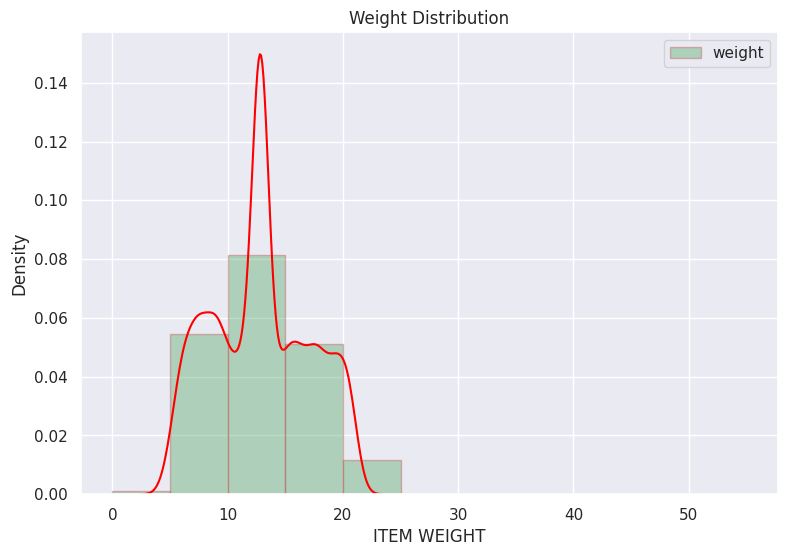

In [ ]:
plt.figure(figsize=(9,6))
sns.set()
sns.distplot(df['Item_Weight'],bins=[0,5,10,15,20,25,30,35,40,45,50,55],
            color='red',axlabel="ITEM WEIGHT",
             label="weight",
            hist_kws={'color':'g','edgecolor':'r'})
plt.title("Weight Distribution")
plt.legend()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

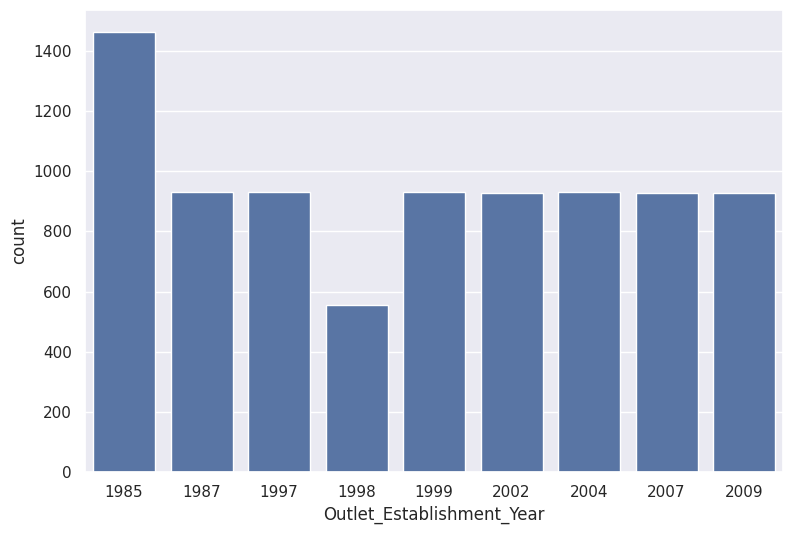

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)

In [ ]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)


In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
encoder=LabelEncoder()

In [ ]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
x=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)


In [ ]:
from sklearn import preprocessing
from sklearn import utils

In [ ]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [ ]:
print(utils.multiclass.type_of_target(y_train))


continuous


In [ ]:
print(utils.multiclass.type_of_target(y_train.astype('int')))


multiclass


In [ ]:
print(utils.multiclass.type_of_target(encoded))


multiclass


In [78]:
from sklearn import linear_model

In [79]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [80]:
y_pred = model.predict(x_test)


In [81]:
y_pred


array([1001.92372566,  671.41748535,  997.24532313, ..., 1363.6757922 ,
       1738.38449676, 3637.4493236 ])

In [63]:
from xgboost import XGBRegressor


In [64]:
regressor = XGBRegressor()

In [83]:
regressor.fit(x_train, y_train)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

SklearnCompatibleXGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                        

In [84]:
y_pred = model.predict(x_test)



In [85]:
y_pred


array([1001.92372566,  671.41748535,  997.24532313, ..., 1363.6757922 ,
       1738.38449676, 3637.4493236 ])